In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv(r'C:\Users\user\Desktop\concrete_data.csv')

In [6]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [7]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

((array([-3.20610174, -2.94154129, -2.79394753, ...,  2.79394753,
          2.94154129,  3.20610174]),
  array([ 2.33,  3.32,  4.57, ..., 80.2 , 81.75, 82.6 ])),
 (16.581469498476213, 35.817961165048544, 0.9903543454427803))

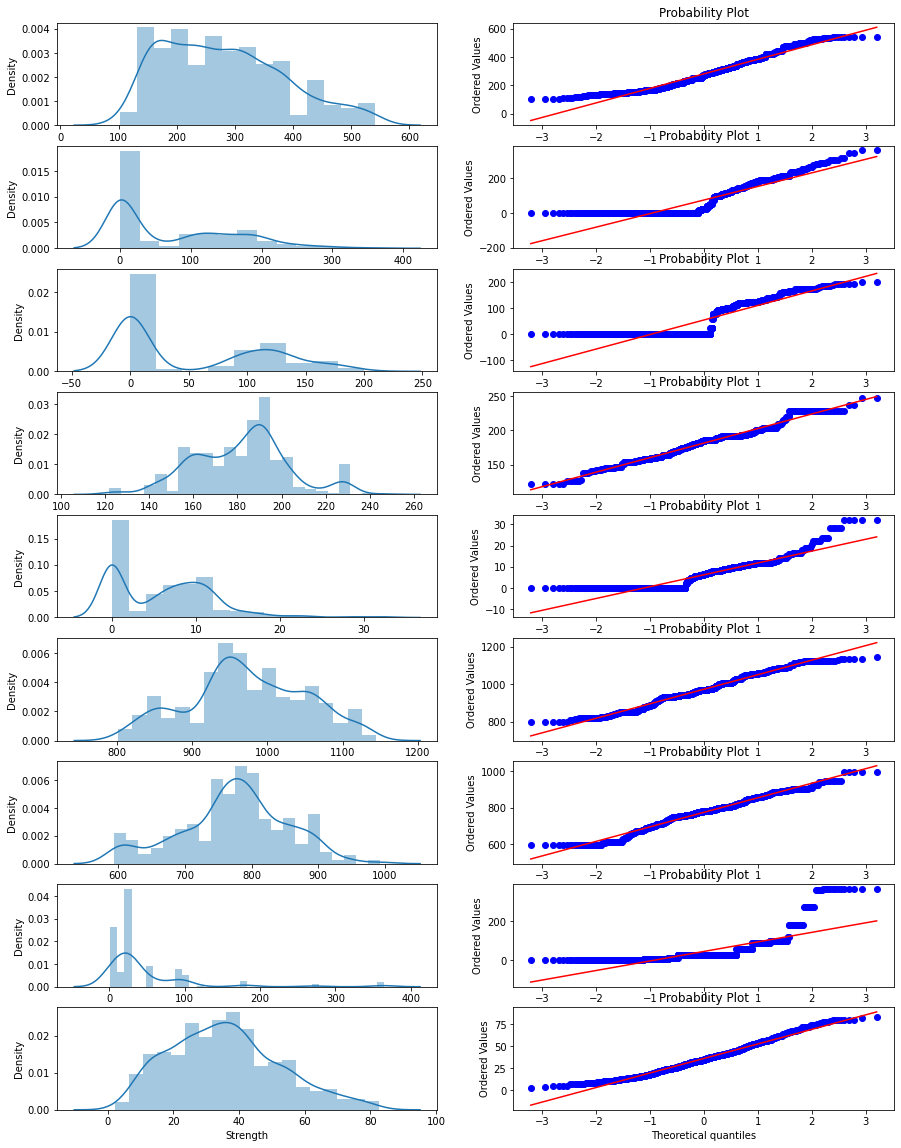

In [41]:
plt.figure(figsize = (15,20))
plt.subplot(9,2,1)
sns.distplot(df['Cement'])
plt.subplot(9,2,2)
stats.probplot(df['Cement'] , dist = 'norm',plot = plt)
plt.subplot(9,2,3)
sns.distplot(df['Blast Furnace Slag'])
plt.subplot(9,2,4)
stats.probplot(df['Blast Furnace Slag'] , dist = 'norm',plot = plt)
plt.subplot(9,2,5)
sns.distplot(df['Fly Ash'])
plt.subplot(9,2,6)
stats.probplot(df['Fly Ash'] , dist = 'norm',plot = plt)
plt.subplot(9,2,7)
sns.distplot(df['Water'])
plt.subplot(9,2,8)
stats.probplot(df['Water'] , dist = 'norm',plot = plt)
plt.subplot(9,2,9)
sns.distplot(df['Superplasticizer'])
plt.subplot(9,2,10)
stats.probplot(df['Superplasticizer'] , dist = 'norm',plot = plt)
plt.subplot(9,2,11)
sns.distplot(df['Coarse Aggregate'])
plt.subplot(9,2,12)
stats.probplot(df['Coarse Aggregate'] , dist = 'norm',plot = plt)
plt.subplot(9,2,13)
sns.distplot(df['Fine Aggregate'])
plt.subplot(9,2,14)
stats.probplot(df['Fine Aggregate'] , dist = 'norm', plot = plt)
plt.subplot(9,2,15)
sns.distplot(df['Age'])
plt.subplot(9,2,16)
stats.probplot(df['Age'] , dist = 'norm', plot = plt)
plt.subplot(9,2,17)
sns.distplot(df['Strength'])
plt.subplot(9,2,18)
stats.probplot(df['Strength'] , dist = 'norm', plot = plt)


               


In [42]:
## transform power transform 
from sklearn.preprocessing import PowerTransformer

In [44]:
pt = PowerTransformer(method='box-cox')
df_transformed = pt.fit_transform(df+0.0000001)

In [45]:
df_transformed

array([[ 1.9942716 , -1.08685375, -0.90528496, ..., -1.20848963,
         0.11185503,  2.24225863],
       [ 1.9942716 , -1.08685375, -0.90528496, ..., -1.20848963,
         0.11185503,  1.44851568],
       [ 0.60739887,  0.94736522, -0.90528496, ..., -2.0857501 ,
         2.14547951,  0.3567465 ],
       ...,
       [-1.45632706,  0.94468921,  1.10093378, ...,  0.03769698,
         0.11185503, -0.66451977],
       [-1.29079247,  0.98034528, -0.90528496, ...,  0.15117183,
         0.11185503, -0.07789587],
       [-0.04388168,  0.90503985,  1.07779322, ..., -0.1947544 ,
         0.11185503, -0.10036815]])

In [46]:
df_transformed  = pd.DataFrame(df_transformed,columns = [df.columns])

In [47]:
df_transformed

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,1.994272,-1.086854,-0.905285,-0.914482,0.485973,0.862161,-1.208490,0.111855,2.242259
1,1.994272,-1.086854,-0.905285,-0.914482,0.485973,1.057114,-1.208490,0.111855,1.448516
2,0.607399,0.947365,-0.905285,2.136472,-1.306273,-0.530498,-2.085750,2.145480,0.356746
3,0.607399,0.947365,-0.905285,2.136472,-1.306273,-0.530498,-2.085750,2.433424,0.399907
4,-0.744848,0.938426,-0.905285,0.496971,-1.306273,0.065409,0.629016,2.420157,0.576146
...,...,...,...,...,...,...,...,...,...
1025,0.108655,0.922385,1.087907,-0.080931,0.758612,-1.319489,-0.109851,0.111855,0.575078
1026,0.521344,-1.086854,1.105328,0.681857,0.794200,-1.979247,0.469052,0.111855,-0.175243
1027,-1.456327,0.944689,1.100934,0.529379,0.674297,-1.036057,0.037697,0.111855,-0.664520
1028,-1.290792,0.980345,-0.905285,-0.268953,0.813363,0.209803,0.151172,0.111855,-0.077896


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


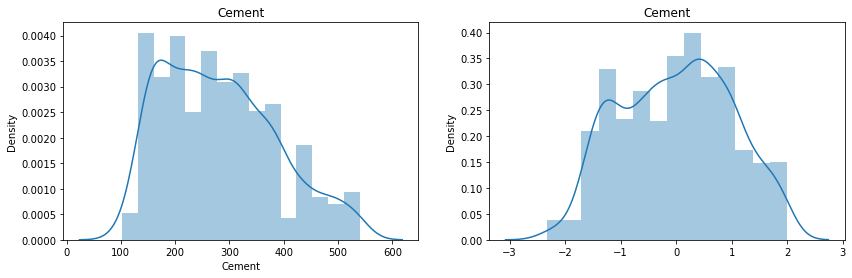

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


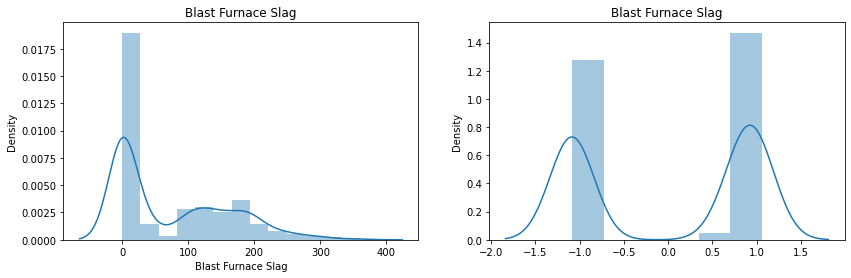

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


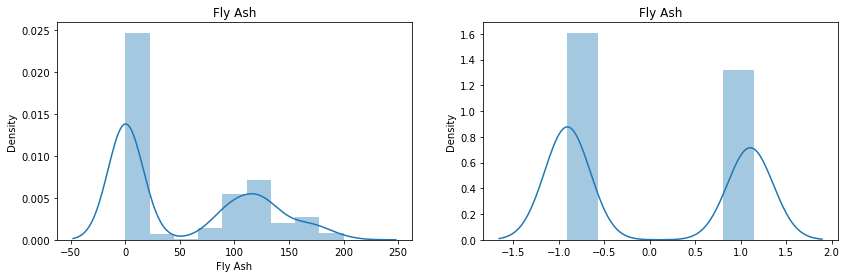

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


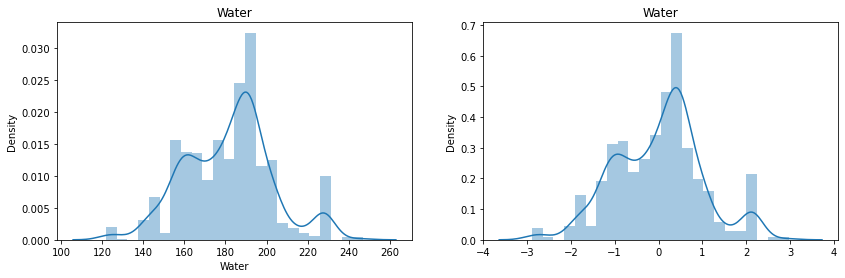

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


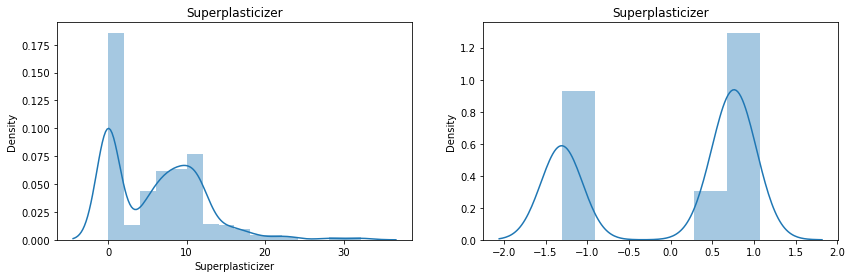

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


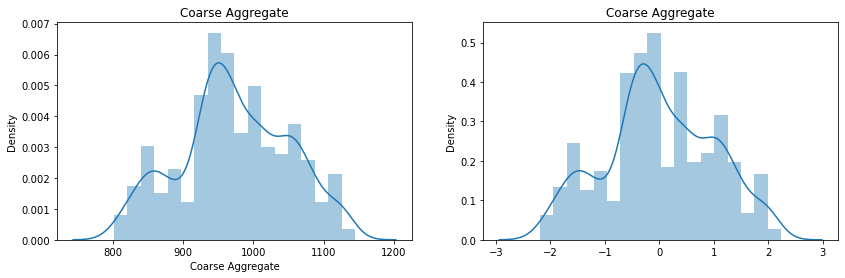

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


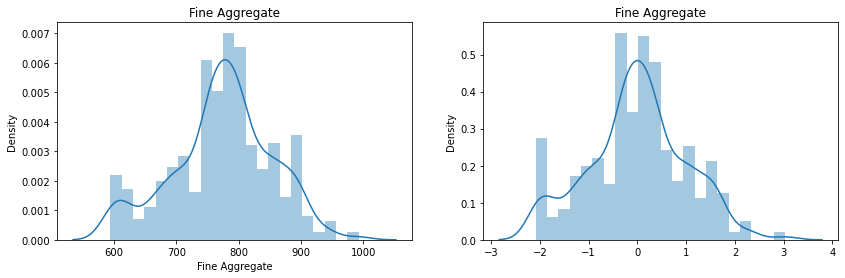

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


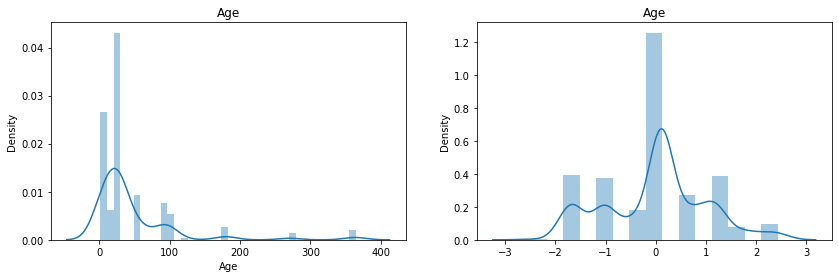

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


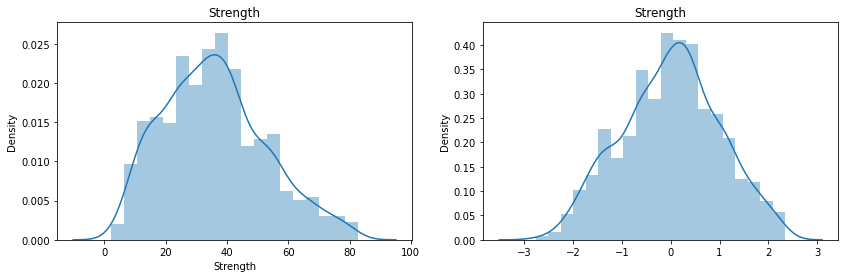

In [56]:
for col in df.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.distplot(df_transformed[col])
    plt.title(col)
    
    plt.show()

In [97]:
df_transformed.reset_index(inplace = True)

In [99]:
df_transformed

,index,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,0,1.994272,-1.086854,-0.905285,-0.914482,0.485973,0.862161,-1.208490,0.111855,2.242259
1,1,1.994272,-1.086854,-0.905285,-0.914482,0.485973,1.057114,-1.208490,0.111855,1.448516
2,2,0.607399,0.947365,-0.905285,2.136472,-1.306273,-0.530498,-2.085750,2.145480,0.356746
3,3,0.607399,0.947365,-0.905285,2.136472,-1.306273,-0.530498,-2.085750,2.433424,0.399907
4,4,-0.744848,0.938426,-0.905285,0.496971,-1.306273,0.065409,0.629016,2.420157,0.576146
...,...,...,...,...,...,...,...,...,...,...
1025,1025,0.108655,0.922385,1.087907,-0.080931,0.758612,-1.319489,-0.109851,0.111855,0.575078
1026,1026,0.521344,-1.086854,1.105328,0.681857,0.794200,-1.979247,0.469052,0.111855,-0.175243
1027,1027,-1.456327,0.944689,1.100934,0.529379,0.674297,-1.036057,0.037697,0.111855,-0.664520
1028,1028,-1.290792,0.980345,-0.905285,-0.268953,0.813363,0.209803,0.151172,0.111855,-0.077896


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1030 and the array at index 1 has size 1